# Python for analysts

## Hometask 4

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import numpy as np

### Задача 1
##### Постройте график. Назовите график. Сделайте именование оси x и оси y. Сделайте выводы

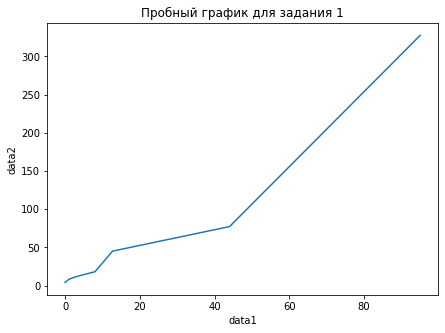

In [11]:
data1 = [0, 1, 2, 4, 8, 12.7, 44, 95]
data2 = [4, 8, 10, 13, 18, 45, 77.1235, 327.44]

plt.figure(figsize = (7, 5))
plt.plot(data1, data2)
plt.title('Пробный график для задания 1')
plt.xlabel('data1')
plt.ylabel('data2');

##### Вывод: 
Наблюдается прямая корреляция между значениями data1 и data2

##### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information

In [14]:
df = pd.read_csv('D:\GeekBrains\Основы языка Python для аналитиков\kc_house_data.csv\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##### 1.2 Изучите стоимости недвижимости

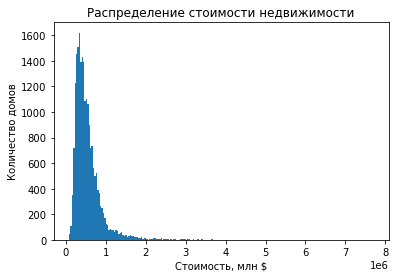

In [22]:
plt.hist(df['price'], bins = int((df.shape[0]/100)))
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость, млн $')
plt.ylabel('Количество домов');

##### Вывод
Большая часть домов стоит до 1 млн $. В данных присутствуют выбросы цен домов до 8 млн

##### 1.3 Изучите распределение квадратуры жилой

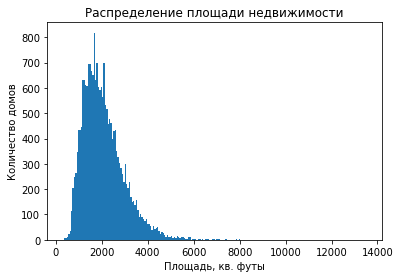

In [25]:
plt.hist(df['sqft_living'], bins = int((df.shape[0]/100)))
plt.title('Распределение площади недвижимости')
plt.xlabel('Площадь, кв. футы')
plt.ylabel('Количество домов');

##### 2.1.4 Изучите распределение года постройки

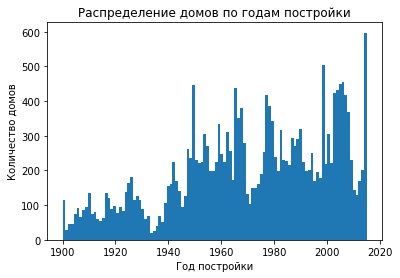

In [27]:
plt.hist(df['yr_built'], bins = int((df.shape[0]/200)))
plt.title('Распределение домов по годам постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');

### 2 задача

##### 2.1 Изучите распределение домов от наличия вида на набережную. Постройте график. Сделайте выводы

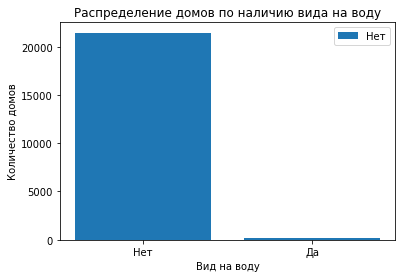

In [93]:
data = df['waterfront'].value_counts()
data.rename(index={0: 'Нет', 1: 'Да'}, inplace = True)

plt.bar(data.index, data.values);
plt.ylabel('Количество домов')
plt.xlabel('Вид на воду')
plt.title('Распределение домов по наличию вида на воду')
plt.legend(['Нет', 'Да']);

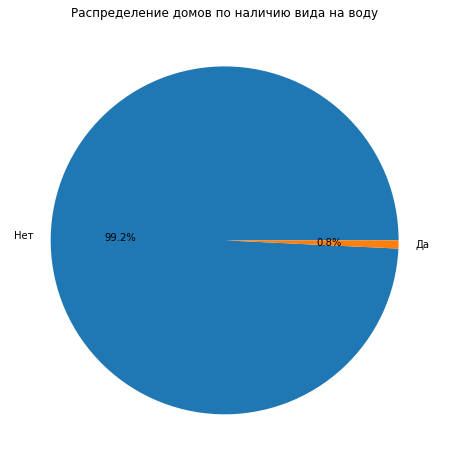

In [80]:
plt.figure(figsize = (8,8))
plt.pie(data, autopct = '%1.1f%%', labels = data.index)
plt.title('Распределение домов по наличию вида на воду');

##### 2.2 Изучите распределение этажей домов

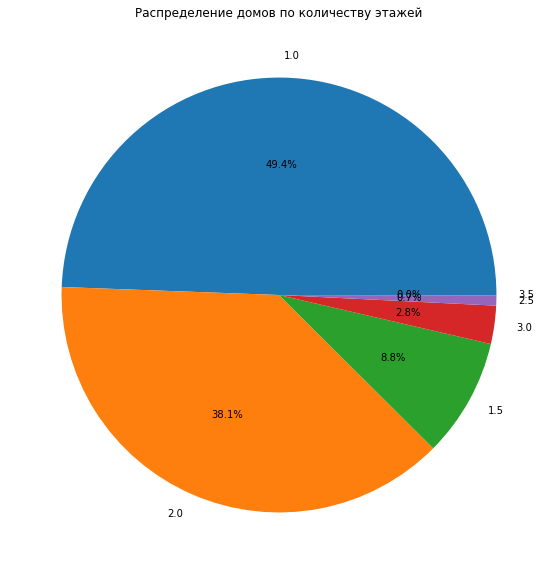

In [86]:
plt.figure(figsize = (10,10))
data = df['floors'].value_counts()
plt.pie(data.values, autopct = '%.1f%%', labels = data.index)
plt.title('Распределение домов по количеству этажей');

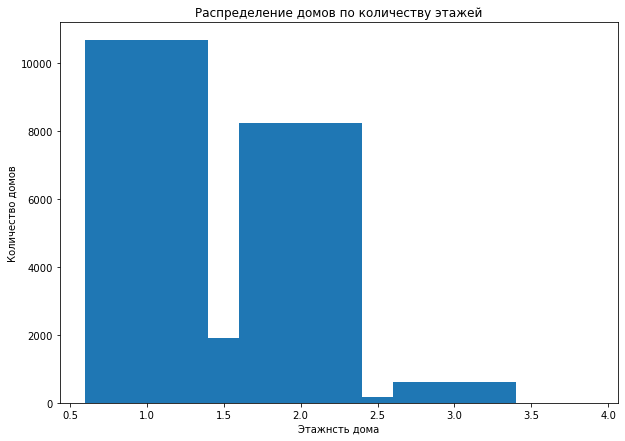

In [89]:
plt.figure(figsize = (10,7))
plt.bar(data.index, data.values)
plt.ylabel('Количество домов')
plt.xlabel('Этажнсть дома')
plt.title('Распределение домов по количеству этажей');

##### 2.2 Изучите распределение состояния домов

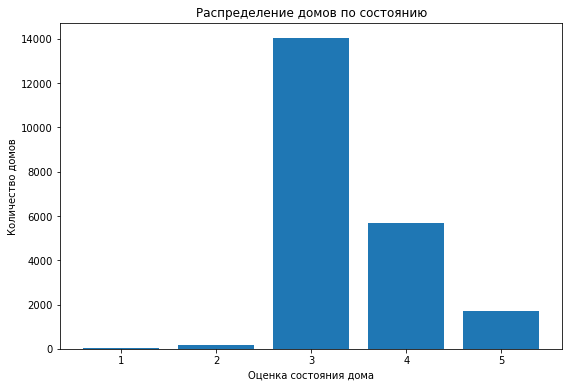

In [92]:
data = df['condition'].value_counts()

plt.figure(figsize = (9, 6))
plt.bar(data.index, data.values);
plt.ylabel('Количество домов')
plt.xlabel('Оценка состояния дома')
plt.title('Распределение домов по состоянию');

### 3 задача


##### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [96]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.4] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.0,0.5,0.7,0.0,0.0,0.0,0.4,0.0,0.7,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0
bedrooms,0.0,0.0,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.0,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.0,0.0,0.8,0.9,0.4,0.0,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.0,0.0,0.5,0.4,0.0,1.0,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
waterfront,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


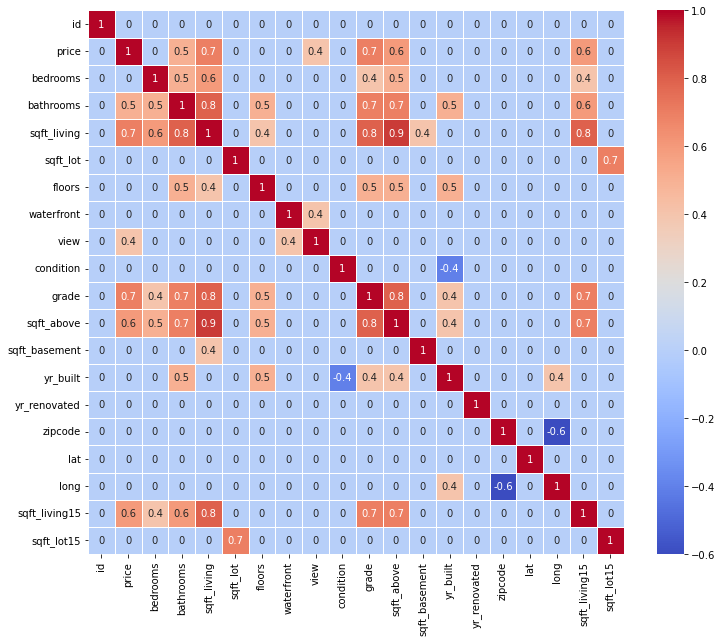

In [97]:
plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix, annot = True, linewidth = 1, cmap = 'coolwarm');

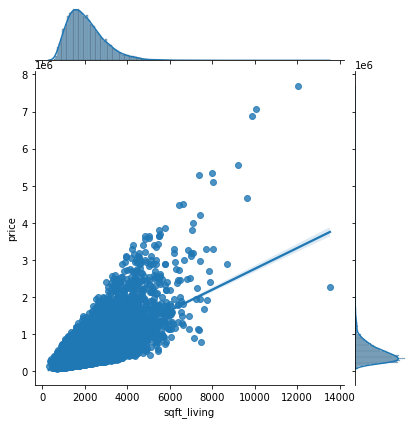

In [69]:
sns.jointplot(x = df['sqft_living'], y = df['price'], kind = 'reg');

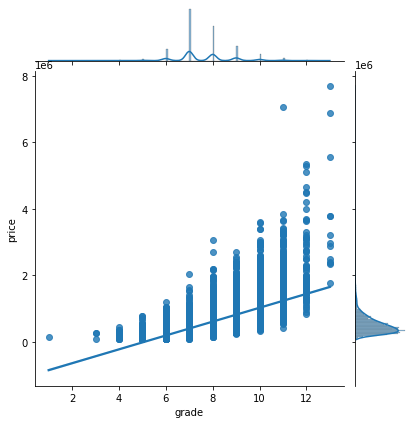

In [71]:
sns.jointplot(x = df['grade'], y = df['price'], kind = 'reg');

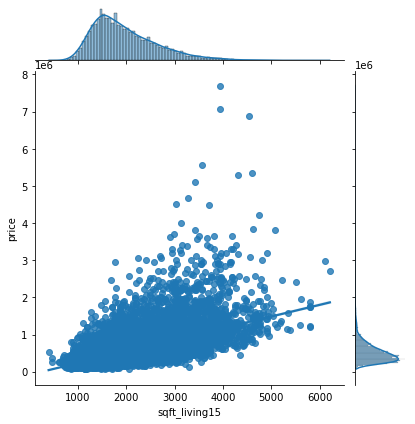

In [72]:
sns.jointplot(x = df['sqft_living15'], y = df['price'], kind = 'reg');

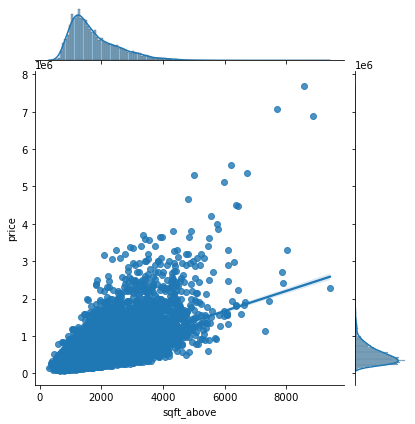

In [73]:
sns.jointplot(x = df['sqft_above'], y = df['price'], kind = 'reg');

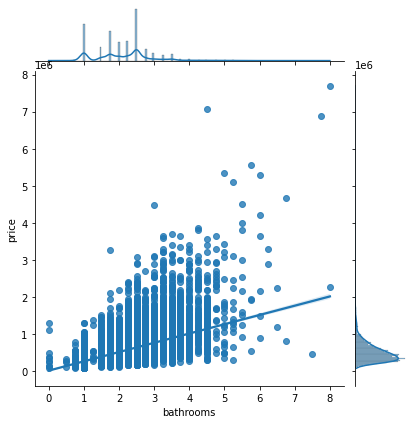

In [74]:
sns.jointplot(x = df['bathrooms'], y = df['price'], kind = 'reg');

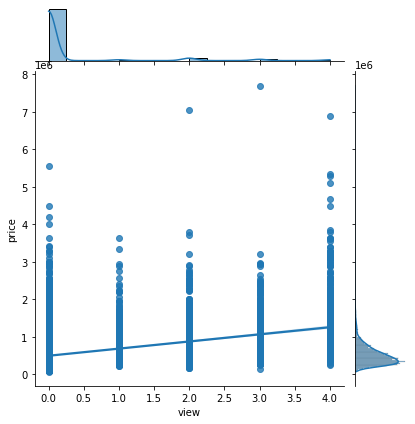

In [98]:
sns.jointplot(x = df['view'], y = df['price'], kind = 'reg');